In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from MSM_util import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import sys, scipy, numpy

# print(scipy.__version__, numpy.__version__, sys.version_info)

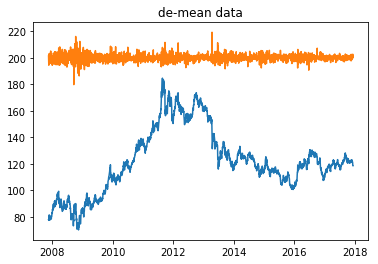

In [17]:
# Hyper parameters

# How much period taken into calculation and prediction
m = 20
# number of days prediction
RV = 22
# kbar
kbar = 3
vary = "k"
kbar_start = 3 
kbar_max = 8

xls_data = pd.read_excel('data_GVZ_GLD.xlsx')
date_GLD = xls_data.iloc[:,3]
GLD = xls_data.loc[:,'GLD']

GLD2 = GLD.shift(1)
GLD2[0] = GLD[0]
GLD_r = GLD/GLD2

GLD_d = GLD_r - np.mean(GLD_r)
plt.plot(date_GLD,GLD)
plt.title('de-mean data')
plt.plot(date_GLD,200*GLD_r)

data = GLD_d[::-1]


startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 5]
op_methods = 'slsqp'



plt.show()

# Fit data

In [18]:
output =msm_fitseries(data, kbar, LB, UB, op_methods, startingvals, m, RV)

No starting values entered: Using grid-search
LL = -7814.4308
==========init params=========
m0 =   1.4291
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4663
b =   5.7643
gamma_k =   0.0823
sigma =   0.2467
LLs = -7837.9933
AIC =  25.9335
BIC =  17.9335
No starting values entered: Using grid-search
LL = -7815.3224
==========init params=========
m0 =   1.4297
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4667
b =   5.7280
gamma_k =   0.0815
sigma =   0.2468
LLs = -7838.9657
AIC =  25.9337
BIC =  17.9337
No starting values entered: Using grid-search
LL = -7818.1649
==========init params=========
m0 =   1.4302
b =   1.5000
gamma_k =   0.1000
sigma =   0.1932


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4678
b =   5.8804
gamma_k =   0.0841
sigma =   0.2472
LLs = -7841.5591
AIC =  25.9344
BIC =  17.9344
No s

In [19]:
a = output
a["GVZ"] = xls_data["GVZ"]
a

,RV,m0,b,gamma_k,sigma,GVZ
0,11.687813,1.466268,5.764339,0.082307,0.246686,11.70
1,11.695531,1.466718,5.728050,0.081528,0.246767,12.99
2,11.738624,1.467818,5.880420,0.084104,0.247221,11.67
3,11.716048,1.467886,5.802658,0.082770,0.246984,12.28
4,11.784609,1.469714,5.991995,0.085954,0.247705,11.38
5,11.770267,1.468194,5.899889,0.084298,0.247554,11.39
6,11.811517,1.468556,6.069747,0.087525,0.247988,11.79
7,11.782923,1.467834,5.914861,0.084559,0.247688,11.02
8,11.809262,1.468204,5.997755,0.086020,0.247964,10.64
9,11.805972,1.468048,5.930450,0.084601,0.247930,10.72


## plot

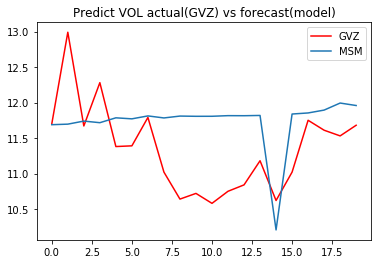

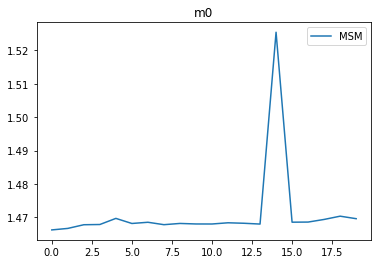

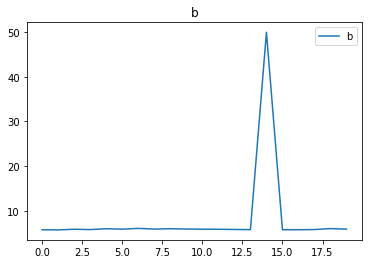

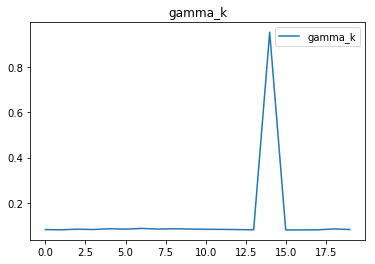

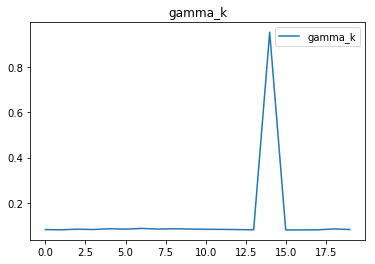

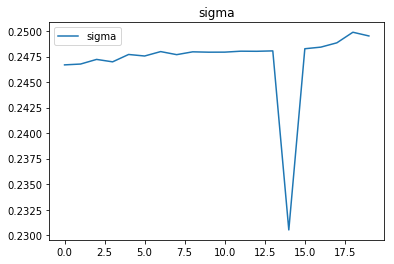

In [20]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]
 
msm_plot(data_lastm, output, m)

## Regression

In [21]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output['RV']), df(data_lastm))

Slope :  0.119141530313
Intercept :  9.95948356095


(0.11914153031294192, 9.9594835609536787)

## XLSX

In [22]:
from datetime import date
text = 'MSM_fitparam'
namew=text + "_kbar" + str(kbar)+ "_RV" + str(22) +'_m' +str(m)+".xlsx"
writer = pd.ExcelWriter("".join((date.today().strftime('%y%m%d'),namew)))
print(writer.path)
output.to_excel(writer, 'Sheet2')
writer.save()

180210MSM_fitparam_kbar3_RV22_m20.xlsx


### load

# Average params

In [23]:
output2 = msm_averageparams(output, kbar, m, data, RV, LB , UB)

In [24]:
output2

,RV,m0,b,gamma_k,sigma
0,11.726989,1.471197,8.079518,0.126936,0.247099
1,11.726989,1.471197,8.079518,0.126936,0.247099
2,11.726989,1.471197,8.079518,0.126936,0.247099
3,11.726989,1.471197,8.079518,0.126936,0.247099
4,11.726989,1.471197,8.079518,0.126936,0.247099
5,11.726989,1.471197,8.079518,0.126936,0.247099
6,11.726989,1.471197,8.079518,0.126936,0.247099
7,11.726989,1.471197,8.079518,0.126936,0.247099
8,11.726989,1.471197,8.079518,0.126936,0.247099
9,11.726989,1.471197,8.079518,0.126936,0.247099


## plot

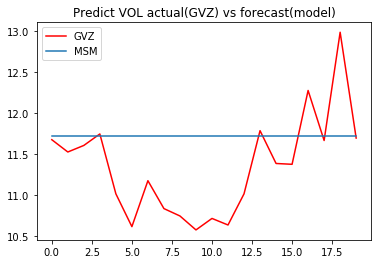

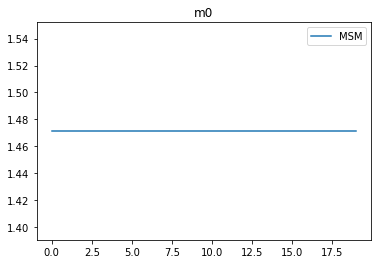

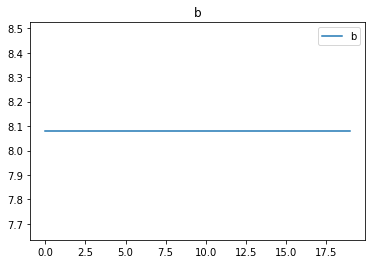

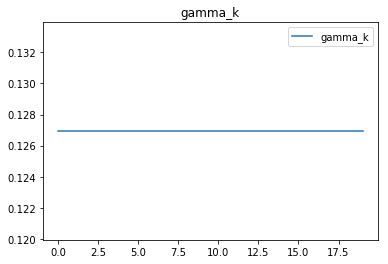

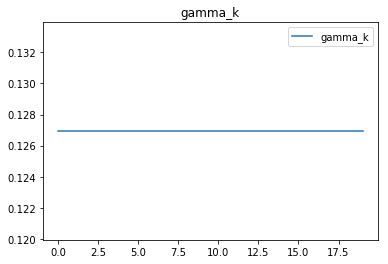

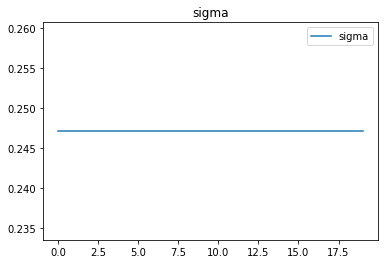

In [25]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

msm_plot(xls_data["GVZ"], output2, m)

## Regression

In [26]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output2['RV']), df(data_lastm))

Slope :  -1.42070790877e+13
Intercept :  1.6660625706e+14


(-14207079087658.77, 166606257060242.06)

In [27]:
data_lastm

19    11.68
18    11.53
17    11.61
16    11.75
15    11.02
14    10.62
13    11.18
12    10.84
11    10.75
10    10.58
9     10.72
8     10.64
7     11.02
6     11.79
5     11.39
4     11.38
3     12.28
2     11.67
1     12.99
0     11.70
Name: GVZ, dtype: float64